Install Libraries and Prepare Data

In [2]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install numpy
%pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('premier-player-23-24.csv', on_bad_lines='skip')

#Remove players with less than 15 appearances
data = data[data['MP'] >= 15]
data = data.reset_index(drop=True)

#Display the first few rows of the data
data.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,FW,23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,MF,23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


Predict the Position

Accuracy: 0.80


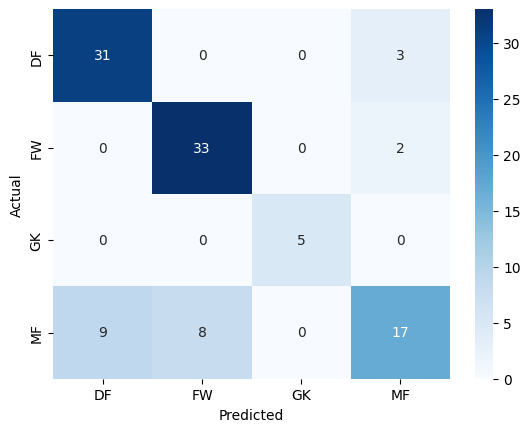

In [4]:
#Feature and Target Selection
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

#features = [ "Ast", "G+A", "G-PK", "CrdR", "xG", "npxG", "xAG", "npxG+xAG", "PrgC", "PrgP", "PrgR", "Gls_90", "Ast_90", "G+A_90", "G-PK_90", "G+A-PK_90", "xG_90", "xAG_90", "xG+xAG_90", "npxG_90", "npxG+xAG_90"]
features = ["Gls", "PrgP", "G+A_90", "npxG_90", "G-PK_90", "PrgC", "npxG+xAG" ]
target = 'Pos'

#Split the data into training and testing sets
x = data[features]
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Train a classification model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Display the accuracy of the model
accuracy = model.score(x_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Replace the numbers in the confusion matrix plot with the position labels
cm = confusion_matrix(y_test, y_pred)
pos_labels = sorted(y.unique())
sns.heatmap(cm, annot=True, fmt='', cmap='Blues', xticklabels=pos_labels, yticklabels=pos_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Predict the Amount of Goals

Mean Squared Error: 3.80
R^2 Score: 0.81


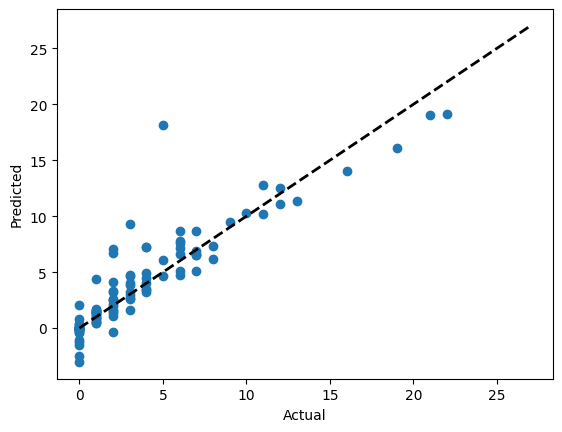

In [6]:
#Feature and Target Selection
features = ["Ast", "xG_90", "xAG_90", "G+A_90", "npxG_90", "npxG+xAG_90", "PrgC", "PrgP", "G-PK_90"]
target = 'Gls'

#Split the data into training and testing sets
x = data[features]
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Train a regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#Display the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

#Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()